1. generate spatial IV for mangrove outside of village

In [1]:
import pandas as pd
import numpy as np
import os
import string
import time as time
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import Polygon

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# input data

In [3]:
shoreline=gpd.read_file(r'C:\Users\zhu.2906\Documents\ArcGIS\Projects\shrug_india\output\new_village_shore_1600_buffer.shp')

village=gpd.read_file(r'C:\Users\zhu.2906\Documents\ArcGIS\Projects\shrug_india\output\village_2011_coast.shp')


In [4]:
print(shoreline.dtypes)
print(shoreline.crs)
print(len(shoreline))

X              float64
Y              float64
NEAR_X         float64
NEAR_Y         float64
index            int64
BUFF_DIST      float64
ORIG_FID         int64
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object
EPSG:7755
70805


In [5]:
print(village.dtypes)
print(village.crs)
print(len(village))

pc11_s_id       object
pc11_d_id       object
pc11_sd_id      object
pc11_tv_id      object
tv_name         object
index            int64
Shape_Leng     float64
Shape_Area     float64
area           float64
X              float64
Y              float64
OBJECTID         int64
pc11_s_id_      object
pc11_d_id_      object
pc11_sd__1      object
pc11_tv__1      object
tv_name_1       object
index_1          int64
area_1         float64
X_1            float64
Y_1            float64
NEAR_FID         int64
NEAR_DIST      float64
NEAR_X         float64
NEAR_Y         float64
geometry      geometry
dtype: object
EPSG:7755
70805


# generate spatial IV for mangrove outside of village

In [6]:
index=shoreline['index'].unique()
df_output=pd.DataFrame()
for i in index:
    mid_shoreline=shoreline[shoreline['index']==i].copy()
    mid_village=village[village['index']==i].copy()

    mid=gpd.overlay(mid_shoreline, mid_village, how='difference')
    print(i)
    df_output=pd.concat([df_output,mid])

gdf_output=gpd.GeoDataFrame(df_output, geometry='geometry',crs=shoreline.crs)

336665
336735
336736
336737
336738
336739
336740
336741
336742
336743
336744
336745
336746
336747
336748
336749
336750
336751
336752
336753
336754
336755
336756
336757
336758
336759
336760
336761
336762
336763
336764
336765
336766
336767
336768
336769
336770
336771
336772
336773
336774
336775
336776
336777
336778
336779
336782
336783
336784
336785
336786
336787
336788
336789
336790
336791
336792
336793
336794
336795
336796
336797
336798
336799
336800
336801
336802
336803
336804
336805
336806
336807
336808
336809
336810
336811
336812
336813
336814
336815
336816
336863
336864
336865
336866
336867
336868
336871
336890
336891
336892
336893
336894
336895
336896
336897
336898
336899
336900
336901
336902
336903
336904
336905
336907
336908
345600
345601
345602
345621
345622
345623
345624
346870
347410
347411
347412
347413
347429
347452
347453
347454
347460
347461
347462
347463
347464
347465
347466
347467
347468
347469
347470
347471
347472
347473
347474
347475
347476
347477
347478
347479
347480

348644
348645
348646
348647
348648
348649
392039
392042
392043
392044
392045
392046
392048
392060
392061
392062
393177
393178
393179
393180
393182
393188
393194
393196
393197
393198
393199
393201
393202
393203
393204
393205
393206
393207
393208
393209
393210
393211
393212
393213
393214
393215
393216
393217
393218
393220
393221
393222
393223
393224
393225
393226
393227
393228
393229
393230
393231
393232
393233
393234
393235
393236
393237
393238
393239
393240
393241
393242
393243
393244
393245
393246
393247
393248
393249
393250
393251
393252
393253
393254
393255
393256
393257
393258
393259
393260
393261
393262
393263
393264
393265
393266
393267
393268
393269
393270
393271
393272
393273
393274
393275
393276
393277
393278
393279
393280
393281
393282
393283
393284
393285
393286
393287
393288
393289
393290
393291
393292
393293
393294
393295
393296
393297
393298
393299
393300
393301
393302
393303
393304
393305
393306
393307
393308
393309
393310
393311
393312
393313
393314
393315
393316
393317

395519
395520
395521
395522
395523
395524
395525
395526
395527
395528
395529
395530
395531
395532
395533
395534
395535
395536
395537
395538
395539
395540
395541
395542
395543
395544
395545
395546
395547
395548
395549
395550
395551
395552
395553
395554
395555
395556
395557
395558
395559
395560
395561
395562
395563
395564
395565
395566
395567
395568
395569
395570
395571
395572
395573
395574
395575
395576
395577
395578
395579
395580
395581
395582
395583
395584
395585
395586
395587
395588
395589
395590
395591
395592
395593
395594
395595
395596
395597
395598
395599
395630
395631
395632
395633
395634
395635
395636
395637
395638
395639
395640
395641
395642
395643
395644
395645
395646
395647
395648
395649
395650
395651
395652
395653
395654
395655
395771
395772
395773
395900
395901
396523
396524
396525
396526
396527
396528
396529
396530
396531
396532
396533
396534
396535
396536
396537
396538
396539
396540
396541
396542
396543
396544
396545
396546
396547
396548
396549
396550
396551
396552
396553

398682
398683
398684
398685
398688
398689
398690
398691
398692
398693
398694
398695
398696
398697
398698
398699
398700
398701
398702
398703
398704
398705
398706
398707
398708
398709
398710
398711
398712
398713
398714
398715
398716
398717
398718
398719
398720
398721
398722
398723
398724
398725
398726
398727
398728
398729
398730
398731
398732
398733
398734
398735
398736
398737
398738
398739
398740
398741
398742
398743
398744
398745
398746
398747
398748
398749
398750
398751
398752
398753
398754
398755
398756
398757
398758
398759
398760
398761
398762
398763
398764
398765
398766
398767
398768
398769
398770
398771
398772
398773
398774
398775
398776
398777
398778
398779
398780
398781
398782
398783
398784
398785
398786
398787
398788
398789
398790
398791
398792
398793
398794
398795
398796
398797
398798
398799
398800
398801
398802
398803
398804
398805
398806
398807
398808
398809
398811
398812
398813
398814
398815
398816
398817
398818
398819
398820
398821
398822
398823
398824
398825
398826
398827

411032
411033
411034
411035
411036
411037
411038
411039
411040
411041
411042
411043
411044
411045
411046
411047
411048
411049
411050
411051
411052
411053
411054
411055
411056
411057
411058
411059
411060
411061
411062
411063
411064
411065
411066
411067
411068
411069
411070
411071
411072
411073
411074
411075
411076
411077
411078
411079
411080
411081
411082
411083
411084
411085
411086
411087
411088
411089
411090
411091
411092
411093
411094
411095
411096
411097
411098
411099
411100
411101
411102
411103
411104
411105
411106
411107
411108
411109
411110
411111
411112
411113
411114
411115
411116
411117
411118
411119
411120
411121
411122
411123
411124
411125
411126
411127
411128
411129
411130
411131
411132
411133
411134
411135
411136
411137
411138
411139
411140
411141
411142
411143
411144
411145
411146
411147
411148
411149
411150
411151
411152
411153
411154
411155
411156
411157
411158
411159
411160
411161
411162
411163
411164
411165
411166
411167
411168
411169
411170
411171
411172
411173
411174

414319
414320
414321
414322
414323
414324
414325
414326
414327
414328
414329
414330
414331
414332
414333
414334
414335
414336
414337
414338
414339
414340
414341
414342
414343
414344
414345
414346
414347
414348
414349
414350
414351
414352
414353
414354
414355
414356
414357
414358
414359
414360
414361
414362
414363
414364
414365
414366
414367
414368
414369
414370
414371
414372
414373
414374
414375
414376
414377
414378
414379
414380
414381
414382
414383
414384
414385
414386
414387
414388
414389
414390
414391
414392
414393
414394
414395
414396
414397
414398
414399
414400
414401
414402
414403
414404
414405
414406
414407
414408
414409
414410
414411
414412
414413
414414
414415
414416
414417
414418
414516
414517
414518
414519
414520
414521
414522
414523
414524
414525
414526
414527
414528
414529
414569
414570
414573
414574
414575
414576
414577
414578
414579
414580
414581
414582
414583
414584
414585
414586
414587
414588
414589
414590
414591
414688
414689
414722
414723
414724
414725
414726
414727

516428
516429
516430
516431
516432
516433
516434
516435
516436
516437
516438
516439
516443
516444
516445
516446
516447
516448
516449
516450
516451
516452
516453
516454
516455
516498
516509
516621
516627
516628
516629
516630
516631
516632
516633
516634
516635
516636
516639
516640
516641
516642
516643
516644
516645
516646
516647
516648
516649
516650
516651
516652
516653
516654
516655
516656
516657
516658
516659
516660
516661
516662
516663
516664
516665
516666
516667
516668
516669
516670
516671
516672
516673
516674
516675
516676
516677
516678
516679
516680
516681
516682
516683
516684
516685
516686
516687
516688
516689
516690
516691
516692
516693
516695
516696
516697
516703
516711
516712
516713
516714
516719
516720
516721
516722
516723
516726
516745
516750
516751
516752
516753
516754
516755
516756
516759
516760
516761
516793
516798
516799
516800
516801
516806
516807
516808
516860
516861
516862
517182
517183
517184
517195
517196
517197
517198
517199
517200
517201
517202
517210
517211
517212

519338
519339
519340
519341
519342
519485
519487
519501
519502
519508
519509
519510
519511
519512
519513
519514
519515
519516
519517
519518
519521
519522
519523
519524
519525
519526
519527
519528
519529
519530
519531
519532
519533
519534
519535
519536
519537
519538
519539
519540
519541
519542
519543
519544
519545
519546
519547
519548
519549
519550
519551
519552
519553
519554
519555
519556
519557
519558
519559
519560
519561
519562
519563
519564
519565
519566
519567
519568
519569
519625
519626
524414
524415
524416
524417
524418
524419
524427
524428
524429
524430
524431
524432
524433
524434
524435
524436
524437
524438
524439
524440
524441
524442
524443
524444
524445
524446
524454
524455
524456
524457
524458
524459
524460
524461
524462
524463
524464
524472
524473
524474
524475
524476
524477
524478
524479
524480
524481
524482
524483
524488
524489
524490
524491
524492
524493
524508
524549
524550
524551
524552
524553
524561
524562
524563
524564
524565
524566
524567
524568
524569
524581
524582

555032
555033
555034
555035
555036
555037
555038
555039
555040
555041
555042
555043
555044
555045
555046
555047
555048
555049
555050
555051
555052
555053
555054
555055
555056
555057
555058
555059
555060
555061
555064
555065
555066
555069
555070
555071
555075
555076
555077
555078
555079
555080
555086
555087
555088
555089
555090
555091
555092
555093
555094
555095
555096
555097
555099
555100
555101
555102
555103
555104
555105
555106
555109
555110
555111
555112
555113
555114
555116
555117
555118
555119
555120
555121
555122
555123
555124
555125
555126
555127
555128
555129
555130
555131
555132
555133
555134
555135
555136
555137
555138
555139
555140
555141
555142
555143
555144
555145
555146
555151
555153
555154
555155
555156
555157
555158
555159
555160
555161
555162
555164
555165
555166
555167
555168
555169
555170
555171
555172
555173
555174
555175
555176
555177
555178
555179
555183
555194
555195
555196
555199
555201
555202
555204
555205
555206
555207
555208
555209
555210
555211
555217
555218

567637
567638
567639
567640
567641
567642
567643
567644
567645
567646
567647
567648
567649
567650
567651
567652
567653
567654
567655
567656
567657
567658
567659
567660
567661
567662
567663
567664
567665
567666
567667
567668
567669
567673
567674
567675
567684
567685
567686
567687
567688
567689
567691
567692
567693
567694
567695
567696
567697
567698
567699
567700
567701
567702
567703
567704
567705
567706
567707
567708
567709
567710
567711
567712
567713
567714
567715
567716
567717
567718
567719
567720
567721
567722
567723
567724
567725
567726
567727
567728
567729
567730
567731
567732
567733
567734
567735
567736
567737
567738
567739
567740
567741
567742
567743
567744
567745
567746
567747
567748
567749
567750
567751
567752
567753
567754
567755
567756
567757
567758
567759
567760
567761
567762
567763
567764
567765
567766
567767
567768
567769
567770
567771
567772
567773
567774
567775
567776
567777
567778
567779
567780
567781
567782
567783
567784
567785
567786
567787
567788
567789
567790
567796

583172
583173
583174
583175
583176
583177
583178
583179
583180
583181
583182
583183
583184
583185
583186
583187
583188
583189
583190
583191
583192
583193
583194
583195
583196
583197
583198
583199
583200
583201
583202
583203
583204
583205
583206
583207
583208
583209
583210
583211
583212
583213
583214
583215
583216
583217
583218
583219
583220
583221
583222
583223
583224
583225
583226
583227
583228
583229
583230
583231
583232
583233
583234
583235
583236
583237
583238
583239
583240
583241
583242
583243
583244
583245
583246
583247
583248
583249
583250
583251
583252
583253
583254
583255
583256
583257
583258
583259
583260
583261
583262
583263
583264
583265
583266
583267
583268
583269
583270
583271
583272
583273
583274
583275
583276
583277
583278
583279
583280
583281
583282
583283
583284
583285
583286
583287
583288
583289
583290
583291
583292
583293
583294
583295
583296
583297
583298
583299
583300
583301
583302
583303
583304
583305
583306
583307
583308
583309
583310
583311
583312
583313
583314

589074
589075
589076
589077
589078
589079
589080
589081
589082
589083
589084
589085
589086
589087
589088
589089
589090
589091
589092
589093
589094
589095
589096
589097
589098
589099
589103
589104
589105
589106
589107
589108
589109
589110
589111
589112
589113
589114
589115
589116
589117
589118
589119
589120
589121
589122
589123
589124
589125
589126
589127
589128
589129
589130
589131
589132
589161
589162
589199
589200
589201
589202
589203
589211
589212
589213
589214
589217
589218
589219
589220
589221
589222
589223
589224
589235
589236
589237
589238
589246
589247
589248
589249
589250
589251
589252
589253
589254
589255
589256
589257
589258
589259
589260
589261
589262
589263
589264
589265
589266
589267
589268
589269
589270
589271
589272
589273
589274
589275
589276
589277
589278
589279
589280
589281
589282
589283
589284
589285
589286
589287
589288
589289
589290
589291
589292
589293
589294
589295
589296
589297
589298
589299
589300
589301
589302
589303
589304
589305
589306
589307
589308
589309

594845
594846
594847
594848
594849
594850
594851
594852
594853
594854
594855
594856
594857
594858
594859
594860
594861
594862
594863
594864
594865
594866
594867
594868
594869
594870
594871
594872
594873
594874
594875
594876
594877
594878
594879
594880
594881
594882
594883
594884
594885
594886
594900
595064
595066
595069
595070
595071
595072
595073
595074
595075
595076
595077
595078
595080
595081
595082
595083
595084
595085
595086
595087
595088
595089
595090
595091
595092
595093
595094
595095
595096
595097
595098
595099
595100
595101
595102
595103
595104
595105
595106
595107
595108
595109
595110
595111
595112
595113
595114
595115
595116
595117
595118
595119
595120
595121
595122
595123
595124
595125
595126
595127
595128
595129
595130
595131
595132
595133
595134
595135
595136
595137
595138
595139
595140
595141
595142
595143
595151
595152
595153
595154
595155
595156
595158
595159
595160
595161
595162
595163
595477
595478
595479
595480
595481
595482
595483
595484
595485
595487
595488
595489

630271
630272
630273
630274
630275
630303
630304
630305
630306
630307
630308
630309
630310
630311
630312
630313
630314
630315
630316
630317
630318
630319
630320
630321
630322
630323
630324
630325
630326
630327
630328
630329
630330
630331
630332
630333
630334
630335
630336
630337
630338
630339
630340
630341
630342
630343
630344
630345
630346
630347
630348
630349
630350
630351
630352
630353
630355
630356
630357
630358
630359
630360
630361
630362
630367
630368
630369
630370
630371
630372
630373
630374
630375
630376
630377
630378
630379
630380
630381
630382
630383
630384
630385
630386
630387
630388
630389
630397
630398
630399
630400
630401
630402
630403
630404
630405
630406
630407
630408
630409
630410
630411
630412
630413
630414
630415
630416
630417
630418
630419
630420
630421
630422
630423
630424
630425
630426
630427
630428
630429
630430
630431
630432
630433
630441
630442
630443
630444
630445
630454
630455
630456
630457
630458
630459
630461
630462
630463
630464
630465
630466
630467
630468

632714
632715
632716
632717
632718
632719
632720
632721
632722
632723
632724
632725
632726
632727
632728
632729
632730
632731
632732
632733
632734
632735
632736
632737
632738
632739
632740
632741
632742
632743
632744
632745
632746
632747
632748
632749
632750
632751
632752
632753
632754
632755
632756
632757
632758
632759
632760
632761
632762
632763
632764
632765
632766
632767
632768
632769
632770
632771
632772
632773
632774
632775
632776
632777
632778
632779
632780
632781
632782
632783
632784
632785
632786
632787
632788
632789
632790
632791
632792
632793
632794
632795
632796
632797
632798
632799
632800
632801
632802
632805
632806
632807
632808
632809
632810
632811
632812
632813
632814
632815
632816
632817
632818
632819
632820
632821
632822
632823
632824
632825
632826
632827
632828
632829
632830
632831
632832
632833
632834
632835
632836
632837
632838
632839
632840
632841
632842
632843
632844
632845
632846
632847
632848
632849
632850
632851
632852
632853
632854
632855
632856
632857
632858

641071
641072
641073
641074
641075
641076
641077
641078
641079
641080
641081
641082
641083
641084
641085
641086
641087
641088
641089
641090
641091
641092
641093
641094
641095
641096
641097
641098
641099
641100
641101
641102
641103
641104
641105
641106
641107
641108
641109
641110
641111
641112
641113
641118
641119
641120
641121
641122
641123
641124
641125
641126
641127
641128
641129
641133
641134
641135
641136
641137
641138
641139
641140
641141
641142
641143
641147
641148
641149
641150
641151
641152
641153
641154
641155
641156
641157
641158
641159
641160
641161
641162
641163
641164
641165
641166
641167
641168
641175
641192
641193
641194
641195
641196
641197
641198
641199
641200
641201
641203
641212
641213
641214
641226
641227
641228
641229
641230
641231
641232
641233
641234
641235
641236
641237
641238
641239
641240
641241
641242
641243
641244
641245
641246
641247
641248
641249
641250
641251
641252
641253
641254
641255
641256
641257
641258
641259
641260
641261
641262
641263
641264
641265

645716
645717
645718
645719
645720
645721
645722
645737
645738
645739
645740
645741
645742
645743
645744
645745
645746
645752
645753
645756
645757
645788
645797
645798
645799
645800
645801
645802
645803
645804
645843
645845
645846
645847
645848
645849
645852
645853
645854
645857
645858
645859
645860
645861
645862
645863
645864
645865
645866
645867
645868
645869
645870
645871
645872
645873
645874
645875
645876
645877
645878
645879
645880
645881
645882
645883
645884
645885
645886
645887
645888
645889
645890
645891
645892
645893
645894
645895
645896
645897
645898
645899
645900
645901
645902
645903
645904
645905
645906
645907
645908
645909
645910
645911
645912
645913
645914
645915
645916
645917
645918
645919
645920
645921
645922
645923
645924
645925
645926
645927
645928
645929
645930
645931
645932
645933
645934
645935
645936
645937
645938
645939
645940
645941
645942
645943
645944
645945
645946
645947
645948
645949
645950
645951
645952
645953
645954
645955
645956
645957
645958
645959
645960

335694
335695
335696
335697
335698
335699
335700
335701
335702
335703
335704
335705
335706
335707
335708
335709
335710
335711
335712
335713
335714
335715
335716
335717
335718
335719
335720
335721
335722
335723
335724
335725
335726
335727
335728
335729
335730
335731
335732
335733
335734
335735
335736
335737
335738
335739
335740
335741
335742
335743
335744
335745
335746
335747
335748
335749
335750
335751
335752
335753
335754
335755
335756
335757
335758
335759
335760
335761
335762
335763
335764
335765
335766
335767
335768
335769
335770
335771
335772
335773
335774
335775
335776
335777
335778
335779
335780
335781
335782
335783
335784
335785
335786
335787
335788
335789
335790
335791
335792
335793
335794
335795
335796
335797
335798
335799
335800
335801
335802
335803
335804
335805
335806
335807
335808
335809
335810
335811
335812
335813
335814
335815
335816
335817
335818
335819
335820
335821
335822
335823
335824
335825
335826
335827
335828
335829
335830
335831
335832
335833
335834
335835
335836

342355
342356
342357
342358
342359
342360
342361
342362
342363
342364
342365
342366
342367
342368
342369
342370
342371
342372
342373
342374
342375
342376
342377
342378
342379
342380
342381
342382
342383
342384
342385
342386
342387
342388
342389
342390
342391
342392
342393
342394
342395
342396
342397
342398
342399
342400
342401
342402
342403
342404
342405
342406
342407
342408
342409
342410
342411
342412
342413
342414
342415
342416
342417
342418
342419
342420
342421
342422
342423
342424
342425
342426
342427
342428
342429
342430
342431
342432
342433
342434
342435
342436
342437
342438
342439
342440
342441
342442
342443
342444
342445
342446
342447
342448
342449
342450
342451
342452
342453
342454
342455
342456
342457
342458
342459
342460
342461
342462
342463
342464
342465
342466
342467
342468
342469
342470
342471
342472
342473
342474
342475
342476
342477
342478
342479
342480
342481
342482
342483
342484
342485
342486
342487
342488
342489
342490
342491
342492
342493
342494
342495
342496
342497

344260
344261
344262
344263
344264
344265
344266
344267
344268
344269
344270
344271
344272
344273
344274
344275
344276
344277
344278
344279
344280
344281
344282
344283
344284
344285
344286
344287
344288
344289
344290
344291
344292
344293
344294
344295
344296
344297
344298
344299
344300
344301
344302
344303
344304
344305
344306
344307
344308
344309
344310
344311
344312
344313
344314
344315
344316
344317
344318
344319
344320
344321
344322
344323
344324
344325
344326
344327
344328
344329
344330
344331
344332
344333
344334
344335
344336
344337
344338
344339
344340
344341
344342
344343
344344
344345
344346
344347
344348
344349
344350
344351
344352
344353
344354
344355
344356
344357
344358
344359
344360
344361
344362
344363
344364
344365
344366
344367
344368
344369
344370
344371
344372
344373
344374
344375
344376
344377
344378
344379
344380
344381
344382
344383
344384
344385
344386
344387
344388
344389
344390
344391
344392
344393
344394
344395
344396
344397
344398
344399
344400
344401
344402

345436
345437
345438
345439
345440
345441
345442
345443
345444
345445
345446
345447
345448
345449
345450
345451
345452
345453
345454
345455
345456
345457
345458
345459
345460
345461
345462
345463
345464
345465
345466
345467
345468
345469
345470
345471
345472
345473
345474
345475
345476
345477
345478
345479
345480
345481
345482
345483
345484
345485
345486
345487
345488
345489
345490
345491
345492
345493
345494
345495
345496
345497
345498
345499
345500
345501
345502
345503
345504
345505
345506
345507
345508
345509
345510
345511
345512
345513
345514
345515
345516
345517
345518
345519
345520
345521
345522
345523
345524
345525
345526
345527
345528
345529
345530
345531
345532
345533
345534
345535
345536
345537
345538
345539
345540
345541
345542
345543
345544
345545
345546
345547
345548
345549
345550
345551
345552
345553
345554
345555
345556
345557
345558
345559
345560
345561
345562
345563
345564
345565
345566
345567
345568
345569
345570
345571
345572
345573
345574
345575
345576
345577
345578

346746
346747
346748
346749
346750
346751
346752
346753
346754
346755
346756
346757
346758
346759
346760
346761
346762
346763
346764
346765
346766
346767
346768
346769
346770
346771
346772
346773
346774
346775
346776
346777
346778
346779
346780
346781
346782
346783
346784
346785
346786
346787
346788
346789
346790
346791
346792
346793
346794
346795
346796
346797
346798
346799
346800
346801
346802
346803
346804
346805
346806
346807
346808
346809
346810
346811
346812
346813
346814
346815
346816
346817
346818
346819
346820
346821
346822
346823
346824
346825
346826
346827
346828
346829
346830
346831
346832
346833
346834
346835
346836
346837
346838
346839
346840
346841
346842
346843
346844
346845
346846
346847
346848
346849
346850
346851
346852
346853
346854
346855
346856
346857
346858
346859
346860
346861
346862
346863
346864
346865
346866
346867
346868
346869
346871
346872
346873
346874
346875
346876
346877
346878
346879
346880
346881
346882
346883
346884
346885
346886
346887
346888
346889

390714
390715
390716
390717
390718
390719
390720
390721
390722
390723
390724
390725
390726
390727
390728
390729
390730
390731
390732
390733
390734
390735
390736
390737
390738
390739
390740
390741
390742
390743
390744
390745
390746
390747
390748
390749
390750
390751
390752
390753
390754
390755
390756
390757
390758
390759
390760
390761
390762
390763
390764
390765
390766
390767
390768
390769
390770
390771
390772
390773
390774
390775
390776
390777
390778
390779
390780
390781
390782
390783
390784
390785
390786
390787
390788
390789
390790
390791
390792
390793
390794
390795
390796
390797
390798
390799
390800
390801
390802
390803
390804
390805
390806
390807
390808
390809
390810
390811
390812
390813
390814
390815
390816
390817
390818
390819
390820
390821
390822
390823
390824
390825
390826
390827
390828
390829
390830
390831
390832
390833
390834
390835
390836
390837
390838
390839
390849
390892
390893
390894
390895
390896
390897
390898
390899
390900
390901
390902
390903
390904
390905
390906
390907

392241
392242
392243
392244
392245
392246
392247
392248
392249
392250
392251
392252
392253
392254
392255
392256
392257
392258
392259
392260
392261
392262
392263
392264
392265
392266
392267
392268
392269
392270
392271
392272
392273
392274
392275
392276
392277
392278
392279
392280
392281
392282
392283
392284
392285
392286
392287
392288
392289
392290
392291
392292
392293
392294
392295
392296
392297
392298
392299
392300
392301
392302
392303
392304
392305
392306
392307
392308
392309
392310
392311
392312
392313
392314
392315
392316
392317
392318
392319
392320
392321
392322
392323
392324
392325
392326
392327
392328
392329
392330
392331
392332
392333
392334
392335
392336
392337
392338
392339
392340
392341
392342
392343
392344
392345
392346
392347
392348
392349
392350
392351
392352
392353
392354
392355
392356
392357
392358
392359
392360
392361
392362
392363
392364
392365
392366
392367
392368
392369
392370
392371
392372
392373
392374
392375
392376
392377
392378
392379
392380
392381
392382
392383

394238
394239
394240
394241
394242
394243
394244
394245
394246
394249
394261
394262
394263
394264
394265
394266
394267
394268
394269
394270
394271
394410
394411
394412
394413
394414
394415
394416
394417
394418
394419
394421
394457
394565
394566
394567
394578
394579
394580
394581
394582
394583
394584
394585
394586
394587
394588
394589
394590
394591
394592
394593
394594
394595
394596
394597
394598
394599
394600
394601
394602
394603
394604
394605
394606
394607
394608
394609
394610
394611
394612
394613
394614
394615
394616
394617
394618
394619
394620
394621
394622
394623
394624
394625
394626
394627
394628
394629
394630
394631
394632
394633
394634
394635
394636
394637
394638
394639
394640
394641
394642
394643
394644
394645
394646
394647
394648
394649
394650
394652
394653
394665
394666
394670
394671
394674
394675
394676
394677
394678
394679
394680
394681
394682
394683
394684
394685
394686
394687
394688
394689
394690
394691
394692
394693
394694
394695
394696
394697
394698
394699
394700
394701

395880
395881
395882
395883
395884
395885
395886
395887
395888
395889
395890
395891
395892
395893
395894
395895
395896
395897
395898
395899
395902
395903
395904
395905
395906
395907
395908
395909
395910
395911
395912
395913
395914
395915
395916
395917
395918
395919
395920
395921
395922
395923
395924
395925
395926
395927
395928
395929
395930
395931
395932
395933
395934
395935
395936
395937
395938
395939
395940
395941
395942
395943
395944
395945
395946
395947
395948
395949
395950
395951
395952
395953
395954
395955
395956
395957
395958
395959
395960
395961
395962
395963
395964
395965
395966
395967
395968
395969
395970
395971
395972
395973
395974
395975
395976
395977
395978
395979
395980
395981
395982
395983
395984
395985
395986
395987
395988
395989
395990
395991
395992
395993
395994
395995
395996
395997
395998
395999
396000
396001
396002
396003
396004
396005
396006
396007
396008
396009
396010
396011
396012
396013
396014
396015
396016
396017
396018
396019
396020
396021
396022
396023
396024

397863
397864
397865
397866
397867
397868
397869
397870
397871
397872
397873
397874
397875
397876
397877
397878
397879
397880
397881
397882
397883
397884
397885
397886
397887
397888
397889
397890
397891
397892
397893
397894
397895
397896
397897
397898
397899
397900
397901
397902
397905
397909
397910
397940
397941
397942
397943
397944
397951
397999
398000
398001
398002
398003
398004
398005
398006
398007
398008
398009
398010
398011
398012
398013
398014
398015
398016
398017
398018
398019
398020
398021
398022
398023
398025
398028
398029
398030
398031
398032
398033
398034
398035
398036
398037
398038
398039
398040
398041
398042
398043
398044
398045
398046
398047
398048
398049
398050
398051
398052
398053
398054
398055
398056
398057
398058
398059
398060
398061
398062
398063
398064
398065
398066
398067
398068
398069
398070
398071
398072
398073
398074
398075
398076
398077
398078
398079
398080
398081
398082
398083
398084
398085
398086
398087
398088
398089
398090
398091
398092
398093
398094
398095

400484
400485
400486
400487
400488
400489
400490
400491
400492
400493
400494
400495
400496
400497
400498
400499
400500
400501
400502
400503
400504
400505
400506
400507
400508
400509
400510
400511
400512
400513
400514
400515
400516
400517
400518
400528
400530
400537
400538
400539
400540
400541
400542
400543
400544
400545
400546
400547
400548
400549
400550
400551
400552
400560
400561
400562
400563
400564
400565
400566
400567
400568
400569
400570
400571
400572
400573
400574
400575
400576
400577
400578
400579
400580
400581
400582
400583
400584
400585
400586
400587
400588
400589
400590
400591
400592
400593
400594
400595
400596
400597
400598
400599
400600
400601
400602
400603
400604
400605
400606
400607
400608
400609
400610
400611
400612
400613
400614
400615
400616
400617
400756
400757
400758
400759
400760
400761
400762
400763
400764
400765
400766
400767
400768
400770
400771
400772
400773
400774
400775
400776
400777
400778
400779
400780
400781
400782
400783
400784
400785
400786
400787
400788

401933
401934
401935
401936
401937
401938
401939
401940
401941
401942
401943
401944
401945
401946
401947
401948
401949
401950
401951
401952
401953
401954
401955
401956
401957
401958
401959
401960
401961
401962
401963
401964
401965
401966
401967
401968
401969
401970
401971
401972
401973
401974
401975
401976
401977
401978
401979
401980
401981
401982
401983
401984
401985
401986
401987
401988
401989
401990
401991
401992
401993
401994
401995
401996
401997
401998
401999
402000
402001
402002
402003
402004
402005
402006
402011
402012
402013
402036
402279
402281
402282
402283
402284
402285
402286
402288
402289
402292
402293
402294
402295
402296
402297
402298
402299
402300
402301
402302
402303
402304
402305
402306
402307
402308
402309
402310
402311
402312
402313
402314
402315
402316
402317
402318
402319
402320
402321
402322
402323
402324
402325
402326
402327
402328
402333
402334
402335
402336
402337
402338
402339
402340
402341
402342
402343
402344
402345
402346
402347
402348
402349
402350
402351

403539
403540
403541
403542
403543
403544
403545
403546
403547
403548
403549
403550
403551
403552
403553
403554
403555
403556
403557
403558
403559
403560
403561
403562
403563
403564
403565
403566
403567
403568
403569
403570
403571
403572
403573
403574
403575
403576
403577
403578
403579
403580
403581
403582
403583
403584
403585
403586
403587
403588
403589
403590
403591
403592
403593
403594
403595
403596
403597
403598
403599
403600
403601
403602
403603
403604
403605
403606
403607
403608
403609
403610
403611
403612
403613
403614
403615
403616
403617
403618
403619
403620
403621
403622
403623
403624
403625
403626
403627
403628
403629
403630
403631
403632
403633
403634
403635
403636
403637
403638
403639
403640
403641
403642
403643
403644
403645
403646
403647
403648
403649
403650
403651
403652
403653
403654
403655
403656
403657
403658
403659
403660
403661
403662
403663
403664
403665
403666
403667
403668
403669
403670
403671
403672
403673
403674
403675
403676
403677
403678
403679
403680
403681

408642
408643
408644
408645
408646
408647
408648
408649
408650
408651
408652
408653
408654
408655
408656
408657
408658
408659
408660
408661
408662
408663
408664
408665
408666
408667
408668
408669
408670
408671
408672
408673
408674
408675
408676
408677
408678
408679
408680
408681
408682
408683
408684
408685
408686
408687
408688
408689
408690
408691
408692
408693
408694
408695
408696
408697
408698
408699
408700
408701
408702
408703
408704
408705
408706
408707
408708
408709
408710
408711
408712
408713
408714
408715
408716
408717
408718
408719
408720
408721
408722
408723
408724
408725
408726
408727
408728
408729
408730
408731
408732
408733
408734
408735
408736
408737
408738
408739
408740
408741
408742
408743
408744
408745
408746
408747
408748
408749
408750
408751
408752
408753
408754
408755
408756
408757
408758
408759
408760
408761
408762
408763
408764
408765
408766
408767
408768
408769
408770
408771
408772
408773
408774
408775
408776
408777
408778
408779
408780
408781
408782
408783
408784

409818
409819
409820
409821
409822
409823
409824
409825
409826
409827
409828
409829
409830
409831
409832
409833
409834
409835
409836
409837
409838
409839
409840
409841
409842
409843
409844
409845
409846
409847
409848
409849
409850
409851
409852
409853
409854
409855
409856
409857
409858
409859
409860
409861
409862
409863
409864
409865
409866
409867
409868
409869
409870
409871
409872
409873
409874
409875
409876
409877
409878
409879
409880
409881
409882
409883
409884
409885
409886
409887
409888
409889
409890
409891
409892
409893
409894
409895
409896
409897
409898
409899
409900
409901
409902
409903
409904
409905
409906
409907
409908
409909
409910
409911
409912
409913
409914
409915
409916
409917
409918
409919
409920
409921
409922
409923
409924
409925
409926
409927
409928
409929
409930
409931
409932
409933
409934
409935
409936
409937
409938
409939
409940
409941
409942
409943
409944
409945
409946
409947
409948
409949
409950
409951
409952
409953
409954
409955
409956
409957
409958
409959
409961

412055
412056
412057
412058
412059
412060
412061
412062
412063
412064
412065
412066
412067
412068
412069
412070
412071
412072
412073
412074
412075
412076
412077
412078
412079
412080
412081
412082
412083
412084
412085
412086
412087
412088
412089
412090
412091
412092
412093
412094
412095
412096
412097
412098
412099
412100
412101
412102
412103
412104
412105
412106
412107
412108
412109
412110
412111
412112
412113
412114
412115
412116
412117
412118
412119
412120
412121
412122
412123
412124
412125
412126
412127
412128
412129
412130
412131
412132
412133
412134
412135
412136
412137
412138
412139
412140
412141
412142
412143
412144
412145
412146
412147
412148
412149
412150
412151
412152
412153
412154
412155
412156
412157
412158
412159
412160
412161
412162
412163
412164
412165
412166
412167
412168
412169
412170
412171
412172
412173
412174
412175
412176
412177
412178
412179
412180
412181
412182
412183
412184
412185
412186
412187
412188
412189
412190
412191
412192
412193
412194
412195
412196
412197

413394
413395
413396
413397
413398
413399
413400
413401
413402
413403
413404
413405
413406
413407
413408
413409
413410
413411
413412
413413
413414
413415
413416
413417
413418
413421
413422
413423
413424
413425
413426
413427
413428
413429
413430
413431
413432
413433
413434
413435
413436
413437
413438
413440
413452
413453
413454
413455
413456
413457
413458
413459
413460
413461
413462
413463
413464
413465
413466
413467
413468
413469
413470
413471
413472
413473
413474
413475
413476
413477
413478
413479
413480
413481
413482
413483
413484
413485
413486
413487
413488
413489
413490
413491
413492
413493
413494
413495
413496
413499
413500
413501
413502
413503
413505
413506
413524
413525
413526
413527
413528
413529
413530
413536
413538
413539
413540
413542
413583
413584
413848
413849
413850
413851
413852
413853
413854
413855
413856
413857
413858
413859
413860
413874
413875
413876
413877
413878
413911
413914
413919
413956
413957
413958
413959
413960
413961
413962
413963
413964
413965
413966
413967

415551
415552
415553
415554
415555
415556
415557
415558
415559
415560
415561
415562
415563
415564
415565
415566
415567
415568
415569
415570
415571
415572
415573
415574
415575
415576
415577
415578
415579
415580
415581
415582
415583
415584
415585
415586
415587
415588
415589
415590
415591
415592
415593
415594
415595
415596
415597
415598
415599
415600
415601
415602
415603
415604
415605
415606
415607
415608
415609
415610
415611
415612
415613
415614
415615
415616
415617
415618
415619
415620
415621
415622
415623
415624
415625
415626
415627
415628
415629
415630
415631
415632
415633
415634
415635
415636
415637
415638
415639
415640
415641
415642
415643
415644
415645
415646
415647
415648
415649
415650
415651
415652
415653
415654
415655
415656
415657
415658
415659
415660
415661
415662
415663
415664
415665
415666
415667
415668
415669
415670
415671
415672
415673
415674
415675
415676
415677
415678
415679
415680
415681
415682
415683
415684
415685
415686
415687
415688
415689
415690
415691
415692
415693

428537
428538
428539
428541
428542
428543
428544
428545
428546
428547
428548
428549
428550
428551
428552
428553
428554
428556
428557
428558
428559
428560
428561
428562
428563
428564
428786
428787
428788
428789
428807
428808
428809
428810
428811
428812
428825
428826
428827
428828
428829
428830
428831
428832
428833
428834
428835
428862
428863
428864
428865
428866
428867
428868
428869
428870
428871
428872
428873
428874
428875
428876
428877
428879
428880
428881
428882
428883
428884
428885
428886
428887
428888
428889
428890
428891
428892
428893
428894
428895
428896
428897
428898
428899
428900
428901
428902
428903
428904
428905
428906
428907
428908
428909
428910
428911
428912
428913
428914
428915
428916
428917
428918
428919
428920
428921
428922
431829
431830
431831
431836
431837
431838
431839
431840
431841
508819
508820
508833
508834
508835
508836
508837
508838
508839
508840
508856
508857
508858
508859
508860
508861
508862
508863
508864
508881
508882
508883
508884
508885
508886
508887
508888

515051
515052
515053
515054
515055
515064
515066
515067
515068
515069
515070
515071
515072
515073
515074
515075
515076
515077
515078
515079
515080
515081
515082
515083
515084
515085
515086
515087
515088
515089
515093
515094
515095
515096
515097
515098
515099
515100
515101
515102
515103
515104
515105
515106
515107
515108
515109
515110
515111
515112
515113
515114
515115
515116
515117
515118
515119
515120
515121
515122
515123
515124
515125
515126
515127
515128
515129
515130
515131
515132
515133
515134
515135
515136
515137
515138
515139
515140
515141
515142
515143
515144
515145
515146
515147
515148
515149
515150
515151
515152
515153
515154
515155
515156
515157
515158
515159
515160
515161
515162
515163
515164
515165
515166
515167
515168
515169
515170
515171
515172
515173
515174
515175
515176
515177
515178
515179
515180
515181
515182
515183
515184
515185
515186
515187
515188
515189
515190
515191
515192
515193
515194
515195
515196
515197
515198
515199
515200
515201
515202
515203
515204
515205

516944
516945
516946
516947
516948
516949
516950
516951
516952
516953
516954
516955
516956
516957
516958
516959
516960
516961
516962
516963
516964
516965
516966
516967
516968
516969
516970
516971
516972
516973
516974
516975
516976
516977
516978
516979
516980
516981
516982
516983
516984
516985
516986
516987
516988
516989
516990
516993
516994
516995
516996
516997
516998
516999
517000
517001
517002
517003
517004
517005
517006
517007
517008
517012
517013
517014
517015
517016
517017
517018
517019
517020
517021
517022
517023
517024
517025
517026
517027
517028
517029
517030
517031
517032
517033
517034
517035
517036
517037
517038
517039
517040
517041
517042
517043
517044
517045
517046
517047
517048
517049
517050
517051
517052
517053
517054
517055
517056
517057
517058
517059
517060
517061
517062
517063
517064
517065
517066
517067
517068
517069
517070
517071
517072
517073
517074
517075
517076
517077
517078
517079
517080
517081
517082
517083
517084
517085
517086
517087
517088
517089
517090
517091

519182
519183
519184
519185
519301
519302
519303
519304
519305
519306
519307
519308
519309
519310
519311
519312
519313
519314
519319
519320
519329
519343
519344
519345
519346
519347
519348
519349
519350
519351
519352
519353
519354
519355
519356
519357
519358
519359
519360
519361
519362
519363
519364
519365
519366
519367
519368
519369
519370
519371
519372
519373
519374
519375
519376
519377
519378
519379
519380
519381
519382
519383
519384
519385
519386
519387
519388
519389
519390
519391
519392
519393
519394
519395
519396
519397
519398
519399
519400
519401
519402
519403
519404
519405
519406
519407
519408
519409
519410
519411
519412
519413
519414
519415
519416
519417
519418
519419
519420
519421
519422
519423
519424
519425
519426
519427
519428
519429
519430
519431
519432
519433
519434
519435
519436
519437
519438
519439
519440
519441
519442
519443
519444
519445
519446
519447
519448
519449
519450
519451
519452
519453
519454
519455
519456
519457
519458
519459
519460
519461
519462
519463
519464

524723
524724
524725
524726
524727
524728
524729
524730
524731
524732
524734
524735
524736
524737
524738
524739
524740
524741
524742
524743
524744
524745
524746
524747
524750
524751
524752
524753
524754
524755
524756
524757
524758
524759
524760
524761
524762
524763
524764
524765
524766
524767
524768
524774
524775
524776
524777
524778
524779
524780
524781
524782
524783
524784
524785
524786
524787
524788
524789
524790
524791
524792
524795
524796
524797
524798
524799
524800
524801
524802
524803
524804
524805
524806
524807
524808
524809
524810
524811
524812
524813
524814
524815
524816
524817
524818
524819
524828
524829
524830
524831
524832
524833
524834
524835
524836
524837
524838
524839
524840
524841
524842
524843
524844
524845
524846
524847
524848
524849
524850
524851
524852
524853
524854
524860
524861
524862
524863
524864
524865
524866
524867
524868
524869
524870
524871
524872
524873
524882
524883
524884
524885
524886
524887
524888
524889
524890
524891
524892
524893
524894
524895
524896

526823
526824
526832
526833
526834
526835
526837
526841
526843
526844
526845
526846
526847
526848
526849
526850
526851
526852
526853
526854
526855
526856
526857
526858
526859
526860
526861
526862
526863
526864
526865
526866
526867
526868
526869
526870
526871
526872
526873
526874
526875
526876
526877
526878
526879
526880
526881
526882
526883
526884
526885
526886
526887
526888
526889
526890
526891
526892
526893
526894
526895
526896
526897
526898
526899
526900
526901
526902
526903
526904
526905
526906
526907
526908
526909
526910
526911
526912
526913
526914
526915
526916
526917
526918
526919
526920
526922
526923
526926
526927
526928
526929
526930
526931
526932
526933
526934
526935
526936
526937
526938
526939
526940
526941
526942
526943
526944
526945
526946
526947
526948
526949
526950
526951
526952
526953
526954
526955
526957
526958
526959
526960
526961
526962
526963
526964
526965
526966
526967
526968
526969
526970
526971
526972
526973
526974
526975
526976
526977
526978
526979
526980
526981

554688
554689
554690
554691
554692
554693
554694
554695
554696
554697
554698
554699
554700
554701
554702
554703
554704
554705
554706
554707
554708
554709
554710
554711
554712
554713
554714
554715
554716
554717
554718
554719
554720
554721
554722
554723
554724
554725
554726
554727
554728
554729
554730
554731
554732
554733
554734
554735
554736
554737
554738
554739
554740
554741
554743
554744
554745
554746
554747
554748
554749
554750
554751
554752
554753
554754
554755
554756
554757
554758
554759
554760
554761
554762
554763
554764
554765
554766
554767
554768
554769
554770
554771
554772
554773
554774
554775
554776
554777
554778
554779
554780
554781
554782
554783
554784
554785
554786
554787
554788
554789
554790
554791
554792
554793
554794
554795
554796
554797
554798
554799
554800
554801
554802
554803
554804
554805
554806
554807
554808
554809
554810
554811
554812
554813
554814
554815
554816
554817
554818
554819
554820
554821
554822
554823
554824
554825
554826
554827
554828
554829
554830
554831

556339
556340
556341
556342
556343
556344
556345
556346
556347
556348
556349
556350
556351
556352
556353
556354
556355
556356
556357
556358
556359
556360
556361
556362
556363
556364
556365
556366
556367
556368
556369
556370
556371
556372
556373
556374
556375
556376
556377
556378
556379
556380
556381
556382
556383
556384
556385
556386
556387
556388
556389
556390
556391
556392
556393
556394
556395
556396
556397
556398
556399
556400
556401
556402
556403
556404
556405
556406
556407
556408
556409
556410
556411
556412
556413
556414
556415
556416
556417
556418
556419
556420
556421
556422
556423
556424
556425
556426
556427
556428
556429
556430
556431
556432
556433
556434
556435
556436
556437
556438
556439
556440
556441
556442
556443
556444
556445
556446
556447
556448
556449
556450
556451
556452
556453
556454
556455
556456
556457
556458
556459
556460
556461
556462
556463
556464
556465
556466
556467
556468
556469
556470
556471
556472
556473
556474
556475
556476
556477
556478
556479
556480
556481

558954
558955
558956
558957
558958
558960
559007
559008
559009
559010
559011
559012
559013
559016
559017
559018
559019
559020
559021
559022
559023
559024
559025
559027
559028
559029
559030
559031
559032
559033
559034
559045
559308
559309
559310
559311
559312
559313
559314
559315
559316
559317
559318
559319
559320
559321
559322
559323
559324
559325
559326
559327
559328
559329
559330
559331
559332
559333
559334
559335
559336
559337
559338
559339
559340
559341
559342
559343
559344
559345
559346
559347
559348
559349
559350
559351
559352
559353
559354
559355
559356
559357
559358
559359
559360
559361
559362
559363
559364
559365
559366
559367
559368
559369
559370
559371
559372
559373
559374
559375
559376
559377
559378
559379
559380
559381
559382
559383
559384
559385
559386
559387
559388
559389
559390
559391
559392
559393
559394
559395
559396
559397
559398
559399
559400
559401
559406
559407
559408
559409
559410
559411
559412
559413
559414
559415
559416
559417
559418
559419
559420
559421
559422

568095
568096
568097
568098
568099
568100
568101
568102
568103
568104
568105
568106
568107
568108
568109
568114
568115
568116
568117
568125
568126
568127
568128
568129
568130
568131
568132
568140
568141
568142
568143
568144
568145
568146
568147
568148
568149
568150
568151
568152
568153
568154
568155
568156
568157
568158
568159
568160
568161
568162
568163
568164
568165
568166
568167
568168
568169
568170
568171
568172
568173
568426
568427
568428
568434
568435
568436
568446
568498
568499
568500
568501
568502
568503
568504
568505
568506
568507
568508
568509
568510
568511
568512
568515
568516
568517
568518
568519
568520
568521
568522
568523
568524
568525
568526
568527
568528
568529
568530
568531
568532
568533
568534
568535
568536
568537
568538
568539
568540
568541
568542
568543
568544
568545
568546
568547
568548
568549
568550
568551
568552
568553
568554
568555
568556
568557
568558
568559
568560
568561
568562
568563
568564
568567
568568
568569
568570
568571
568572
568573
568574
568575
568576

570479
570480
570481
570482
570483
570484
570485
570486
570487
570488
570489
570490
570491
570492
570493
570494
570495
570496
570497
570498
570532
570533
570534
570535
570586
570588
570589
570590
570591
570592
570593
570594
570595
570596
570597
570598
570599
570600
570601
570602
570603
570606
570607
570608
570609
570610
570611
570612
570613
570615
570616
570618
570623
570624
570625
570626
570627
570628
570629
570630
570631
570632
570633
570634
570635
570636
570637
570638
570639
570640
570641
570642
570643
570644
570645
570646
570647
570648
570649
570650
570651
570652
570653
570654
570655
570656
570657
570658
570659
570660
570661
570662
570663
570664
570665
570666
570667
570668
570669
570670
570671
570672
570673
570674
570675
570676
570677
570678
570679
570680
570681
570682
570683
570684
570685
570686
570687
570688
570689
570690
570691
570692
570693
570694
570695
570696
570697
570698
570699
570700
570701
570708
570709
570715
570716
570717
570723
570724
570725
570726
570727
570728
570729

584306
584307
584308
584312
584313
584314
584315
584316
584317
584318
584319
584320
584472
584473
584474
584476
584477
584478
584479
584480
584481
584509
584510
584511
584519
584866
584869
584870
584871
584872
584873
584874
584875
584876
584877
584878
584879
584882
584883
584884
584885
584886
584887
584888
584889
584890
584891
584892
584893
584894
584895
584896
584897
584898
584899
584900
584901
584902
584903
584904
584905
584921
584922
584923
584924
584925
584926
584927
584928
584929
584930
584931
584932
584933
584934
584935
584936
584937
584938
584939
584940
584941
584942
584943
584944
584945
584946
584947
584948
584949
584950
584951
584952
584953
584954
584955
584967
584968
584969
584970
584971
584972
584973
584974
584975
584976
584977
584978
584979
584980
584981
584982
584983
584984
584985
584986
584987
584988
584999
585000
585001
585002
585003
585004
585005
585006
585007
585008
585009
585010
585011
585012
585013
585017
585018
585019
585021
585023
585024
585025
585026
585027
585028

587001
587002
587003
587004
587005
587006
587007
587008
587009
587010
587011
587012
587013
587014
587015
587016
587017
587018
587019
587020
587021
587022
587023
587024
587025
587026
587027
587028
587029
587030
587031
587032
587033
587034
587035
587036
587037
587038
587039
587040
587041
587042
587043
587044
587045
587046
587047
587048
587049
587050
587051
587052
587053
587054
587055
587056
587057
587058
587059
587060
587061
587062
587063
587064
587065
587066
587067
587068
587069
587070
587071
587072
587073
587074
587075
587076
587077
587078
587079
587080
587081
587082
587083
587084
587085
587086
587087
587088
587089
587090
587091
587092
587093
587094
587095
587096
587097
587098
587099
587100
587101
587102
587103
587104
587105
587106
587107
587108
587109
587110
587111
587112
587113
587114
587115
587116
587117
587118
587119
587120
587121
587122
587123
587124
587125
587126
587127
587128
587129
587130
587131
587132
587133
587134
587135
587136
587137
587138
587139
587140
587141
587142
587143

588279
588280
588281
588282
588283
588284
588285
588286
588288
588289
588290
588291
588292
588294
588296
588297
588298
588367
588368
588369
588371
588372
588373
588374
588375
588376
588379
588380
588381
588382
588383
588385
588386
588387
588388
588389
588390
588391
588392
588393
588394
588409
588410
588412
588413
588414
588415
588416
588417
588418
588419
588420
588421
588422
588423
588424
588425
588426
588427
588428
588429
588430
588431
588432
588433
588434
588435
588436
588437
588438
588439
588440
588441
588442
588443
588444
588445
588446
588447
588448
588449
588450
588451
588452
588453
588454
588455
588456
588457
588458
588459
588460
588461
588462
588463
588464
588465
588466
588467
588468
588469
588470
588471
588484
588485
588486
588487
588489
588490
588491
588492
588493
588494
588495
588496
588497
588498
588499
588500
588501
588502
588503
588504
588505
588506
588507
588508
588509
588510
588511
588512
588513
588514
588515
588516
588517
588518
588519
588520
588521
588522
588523
588524

590206
590207
590208
590209
590210
590211
590212
590213
590214
590215
590216
590217
590218
590219
590220
590221
590222
590223
590224
590225
590226
590227
590228
590230
590231
590237
590238
590239
590240
590272
590273
590274
590275
590276
590277
590278
590279
590280
590281
590282
590283
590284
590285
590286
590287
590288
590289
590290
590291
590292
590293
590294
590295
590296
590297
590298
590299
590300
590301
590302
590303
590304
590305
590306
590307
590308
590309
590310
590311
590312
590313
590314
590315
590316
590317
590318
590319
590320
590321
590322
590323
590324
590325
590326
590327
590328
590329
590330
590331
590332
590333
590334
590335
590336
590337
590338
590339
590340
590341
590342
590343
590344
590345
590346
590347
590348
590349
590350
590351
590352
590353
590354
590355
590356
590357
590358
590359
590360
590361
590362
590363
590364
590365
590366
590367
590368
590369
590370
590371
590372
590386
590387
590388
590396
590407
590446
590447
590448
590449
590452
590453
590454
590455

592456
592457
592458
592459
592460
592461
592462
592463
592464
592465
592466
592467
592468
592469
592470
592471
592472
592473
592474
592475
592476
592477
592478
592479
592480
592481
592482
592483
592484
592485
592486
592487
592488
592489
592490
592491
592492
592493
592494
592495
592496
592497
592498
592499
592500
592501
592502
592503
592504
592505
592506
592507
592508
592509
592510
592511
592512
592513
592514
592515
592516
592517
592518
592519
592520
592521
592522
592523
592524
592525
592526
592527
592528
592529
592530
592531
592532
592533
592534
592535
592536
592537
592538
592539
592540
592541
592542
592543
592544
592545
592546
592547
592548
592549
592550
592551
592552
592553
592554
592555
592556
592557
592558
592559
592560
592561
592562
592563
592564
592565
592566
592567
592568
592569
592570
592571
592572
592573
592574
592575
592576
592579
592584
592585
592586
592587
592588
592605
592606
592607
592613
592614
592615
592616
592617
592618
592630
592631
592632
592633
592634
592635
592636

594535
594536
594537
594538
594539
594540
594541
594542
594543
594545
594555
594602
594603
594604
594605
594613
594616
594617
594618
594619
594621
594622
594623
594624
594625
594626
594627
594628
594629
594630
594631
594632
594633
594634
594635
594636
594637
594638
594639
594640
594641
594642
594643
594644
594645
594646
594647
594648
594649
594650
594651
594652
594653
594654
594655
594656
594657
594658
594659
594660
594661
594662
594663
594664
594665
594666
594667
594668
594669
594673
594674
594675
594678
594679
594708
594709
594710
594711
594712
594713
594714
594715
594716
594717
594718
594719
594720
594721
594722
594723
594724
594725
594726
594727
594728
594729
594730
594731
594732
594733
594734
594735
594736
594737
594738
594739
594740
594741
594742
594743
594744
594745
594746
594747
594748
594749
594750
594751
594752
594753
594754
594755
594756
594757
594758
594763
594764
594765
594766
594767
594768
594777
594778
594779
594780
594781
594782
594783
594784
594785
594786
594787
594788

599371
599372
599373
599374
599375
599376
599377
599378
599379
599380
599381
599382
599383
599384
599387
599388
599389
599390
599391
599398
599401
599402
599403
599404
599409
599410
600745
600746
600747
600752
600753
600754
600755
600756
600757
600758
600759
600760
600761
600763
600766
600767
600828
600829
600830
600831
600832
600833
600834
600835
600836
600837
600838
600839
600840
600841
600842
600843
600844
600845
600846
600847
600848
600849
600850
600851
600852
600853
600854
600855
600856
600857
600858
600859
600860
600861
600862
600863
600864
600865
600867
600868
600869
600891
600892
600938
600939
600940
600941
600942
600943
600944
600945
600946
600947
600948
600949
600950
600951
600952
600953
600954
600955
600956
600957
600958
600959
600960
600961
600962
600963
600964
600965
600966
600967
600968
600969
600970
600971
600972
600973
600974
600975
600976
600977
600979
600981
600982
600983
600984
600985
600986
600987
600988
600989
600990
600991
600992
600993
600994
600996
600997
600998

610658
610659
610660
610661
610662
610663
610664
610665
610666
610667
610668
610669
610670
610671
610672
610673
610674
610675
610676
610677
610678
610680
610681
610682
610683
610684
610685
610686
610716
610717
610718
610719
610720
610721
610722
610723
610724
610725
610726
610727
610728
610729
610730
610731
610732
610733
610734
610735
610736
610737
610738
610739
610740
610741
610742
610743
610746
610747
610748
610749
610750
610751
610752
610753
610754
610755
610756
610757
610758
610759
610760
610761
610762
610763
610764
610765
610766
610767
610776
610777
610778
610796
610975
610976
610977
610978
610979
610980
610981
610982
610983
610984
610985
610986
610987
610988
610989
610990
610991
610992
610993
610994
610995
610996
610997
610998
610999
611000
611001
611002
611003
611004
611005
611006
611007
611008
611009
611010
611011
611012
611013
611014
611015
611016
611017
611018
611019
611020
611021
611022
611023
611024
611025
611026
611027
611028
611029
611030
611031
611032
611033
611034
611035

622254
629876
629877
629878
629879
629880
629881
629976
629977
629978
629979
629983
629984
629985
629986
629991
629992
629993
629994
629995
629996
629997
629998
629999
630000
630001
630002
630003
630004
630005
630006
630007
630008
630009
630010
630011
630012
630013
630014
630015
630016
630017
630018
630019
630020
630021
630022
630023
630024
630025
630026
630027
630028
630029
630030
630031
630032
630033
630034
630035
630036
630037
630038
630039
630040
630041
630042
630043
630044
630045
630046
630047
630048
630049
630050
630051
630052
630053
630054
630055
630056
630057
630058
630059
630060
630061
630062
630063
630064
630065
630066
630067
630068
630069
630070
630071
630072
630073
630074
630075
630076
630077
630078
630079
630080
630083
630084
630088
630089
630090
630091
630098
630099
630100
630102
630111
630185
630186
630187
630213
630214
630215
630216
630217
630218
630219
630220
630221
630222
630223
630224
630225
630226
630227
630228
630229
630230
630231
630232
630233
630234
630235
630236

632422
632423
632424
632425
632426
632427
632428
632429
632430
632431
632432
632433
632434
632435
632436
632437
632438
632439
632440
632441
632442
632445
632446
632447
632448
632449
632458
632459
632460
632461
632463
632469
632470
632471
632472
632480
632484
632485
632486
632487
632489
632490
632491
632492
632536
632539
632540
632541
632542
632543
632544
632545
632546
632547
632548
632549
632550
632551
632552
632553
632554
632555
632564
632565
632566
632567
632568
632569
632570
632571
632572
632573
632574
632575
632576
632588
632589
632590
632591
632592
632593
632594
632595
632596
632597
632598
632599
632600
632601
632602
632603
632604
632605
632606
632607
632608
632609
632610
632611
632612
632613
632628
632630
632631
632632
632633
632634
632635
632636
632637
632638
632639
632640
632641
632656
632657
632658
632659
632660
632677
632682
632690
632699
632803
632804
632935
632936
632937
632938
632939
632940
632941
632942
632943
632944
632945
632946
632947
632948
632949
632950
632951
632952

635635
635636
635637
635638
635639
635640
635651
635652
635663
635664
635665
635666
635667
635668
635669
635672
635673
635674
635675
635676
635681
635683
635686
635687
635689
635690
635691
635692
635693
635694
635695
635696
635697
635698
635699
635700
635701
635702
635703
635704
635705
635706
635707
635708
635709
635710
635711
635712
635713
635714
635715
635716
635717
635718
635719
635720
635721
635722
635723
635724
635725
635726
635727
635728
635729
635730
635731
635732
635733
635734
635736
635737
635738
635739
635740
635741
635742
635743
635744
635745
635746
635747
635748
635749
635750
635751
635752
635753
635754
635755
635756
635757
635758
635759
635760
635761
635762
635763
635764
635765
635766
635767
635768
635769
635770
635771
635772
635773
635774
635775
635776
635777
635778
635779
635780
635781
635782
635783
635784
635785
635786
635787
635788
635789
635790
635791
635792
635793
635794
635795
635796
635797
635798
635799
635800
635801
635802
635803
635804
635805
635806
635807
635808

640028
640029
640030
640031
640032
640033
640034
640035
640036
640037
640038
640039
640040
640041
640042
640043
640044
640045
640046
640047
640048
640049
640050
640051
640052
640053
640054
640055
640056
640057
640058
640059
640060
640061
640062
640063
640064
640065
640066
640067
640068
640069
640070
640071
640072
640073
640074
640075
640076
640077
640078
640079
640080
640081
640082
640083
640084
640085
640086
640087
640088
640089
640090
640091
640092
640093
640094
640095
640096
640097
640098
640099
640100
640101
640102
640103
640104
640105
640106
640107
640108
640109
640111
640112
640113
640114
640115
640116
640117
640118
640126
640127
640128
640129
640130
640131
640132
640133
640134
640135
640136
640137
640138
640147
640148
640149
640150
640151
640152
640153
640154
640155
640156
640157
640158
640159
640160
640161
640162
640163
640164
640165
640166
640167
640168
640173
640174
640175
640176
640177
640178
640179
640180
640181
640182
640183
640184
640191
640192
640193
640194
640195
640196

642233
642234
642235
642236
642237
642238
642239
642240
642241
642242
642243
642244
642245
642246
642247
642248
642249
642250
642251
642252
642253
642254
642255
642256
642257
642258
642259
642260
642261
642262
642263
642264
642265
642266
642267
642268
642269
642270
642271
642272
642273
642274
642275
642276
642277
642278
642279
642280
642281
642282
642283
642284
642285
642286
642287
642288
642289
642290
642291
642292
642293
642294
642295
642296
642297
642298
642299
642300
642301
642302
642303
642304
642305
642306
642307
642308
642309
642310
642311
642312
642313
642314
642315
642316
642317
642318
642319
642320
642321
642322
642323
642324
642325
642326
642327
642328
642329
642330
642331
642332
642333
642334
642335
642336
642337
642338
642339
642340
642341
642342
642343
642344
642345
642346
642347
642348
642349
642350
642351
642352
642353
642354
642355
642356
642357
642358
642359
642360
642361
642362
642363
642364
642365
642366
642367
642368
642369
642370
642371
642372
642373
642374
642375

643972
643973
643974
643975
643976
643977
643978
643979
643980
643981
643982
643983
643984
643985
643986
643987
643988
643989
643990
643991
643992
643993
643994
643995
643996
643997
643998
643999
644000
644001
644002
644003
644004
644005
644006
644007
644008
644009
644010
644011
644012
644013
644014
644015
644016
644017
644018
644019
644020
644021
644022
644023
644024
644025
644026
644027
644028
644029
644030
644031
644032
644033
644034
644035
644036
644037
644038
644039
644040
644041
644042
644043
644044
644045
644046
644047
644048
644049
644050
644051
644052
644053
644054
644055
644056
644057
644058
644059
644060
644061
644062
644063
644064
644065
644066
644067
644068
644069
644070
644071
644072
644073
644074
644075
644076
644077
644078
644079
644080
644081
644088
644089
644090
644091
644102
644103
644104
644105
644106
644107
644108
644109
644110
644111
644112
644119
644120
644121
644122
644123
644124
644125
644126
644127
644128
644129
644130
644131
644132
644133
644134
644135
644136

646555
646556
646557
646558
646559
646560
646561
646563
646564
646565
646566
646572
646573
646574
646575
646579
646581
646582
646583
646592
646593
646594
646595
646596
646597
646598
646599
646600
646601
646602
646603
646604
646605
646606
646607
646608
646609
646610
646611
646614
646615
646618
646619
646620
646621
646622
646623
646624
646625
646626
646627
646628
646629
646630
646631
646632
646633
646634
646635
646636
646637
646638
646639
646640
646641
646642
646643
646644
646646
646647
646648
646649
646650
646651
646652
646653
646654
646655
646656
646657
646658
646659
646660
646661
646662
646663
646664
646665
646666
646667
646668
646669
646670
646671
646672
646673
646674
646675
646676
646677
646678
646679
646680
646681
646682
646683
646684
646685
646686
646687
646688
646689
646690
646691
646692
646693
646694
646695
646696
646697
646698
646699
646700
646701
646702
646703
646704
646705
646706
646707
646708
646709
646710
646711
646712
646713
646714
646715
646716
646717
646718
646719
646720

In [7]:
print(gdf_output.crs)

EPSG:7755


In [9]:
gdf_output.to_file('mangrove_iv_1600.shp')

<Axes: >

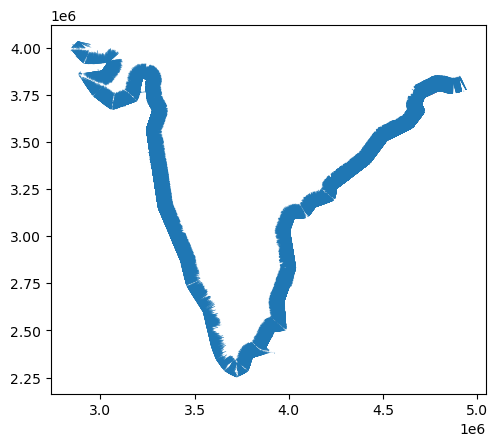

In [10]:
gdf_output.plot()